In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING DATA
data=pd.read_csv('SBI_Historical_Data.csv',index_col='Date',parse_dates=True)

In [3]:
data.sort_index(inplace=True)

In [4]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-01,314.00,312.45,315.00,310.70,6.14M,0.69%
2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%
2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%
2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%
...,...,...,...,...,...,...
2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%
2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%


In [5]:
data.shape

(1385, 6)

In [6]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
#STATISTICAL SUMMARY
data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [13]:
#VISUALISATION
y=data['Open'].resample('MS').mean()
y

Date
2015-01-01    316.564286
2015-02-01    298.037500
2015-03-01    284.397619
2015-04-01    279.997368
2015-05-01    278.265000
                 ...    
2020-04-01    187.327778
2020-05-01    164.734211
2020-06-01    180.379545
2020-07-01    190.054348
2020-08-01    192.370000
Freq: MS, Name: Open, Length: 68, dtype: float64

<AxesSubplot:xlabel='Date'>

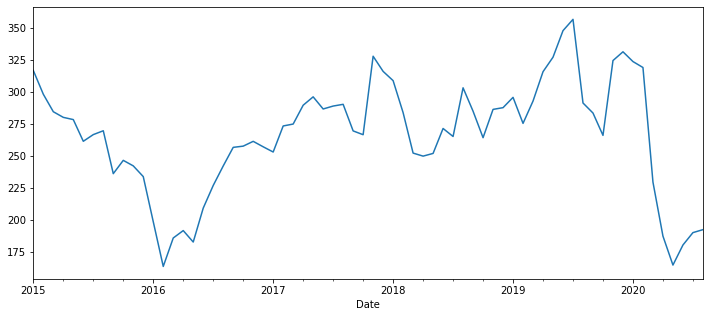

In [14]:
plt.figure(figsize=(12,5))
y.plot()

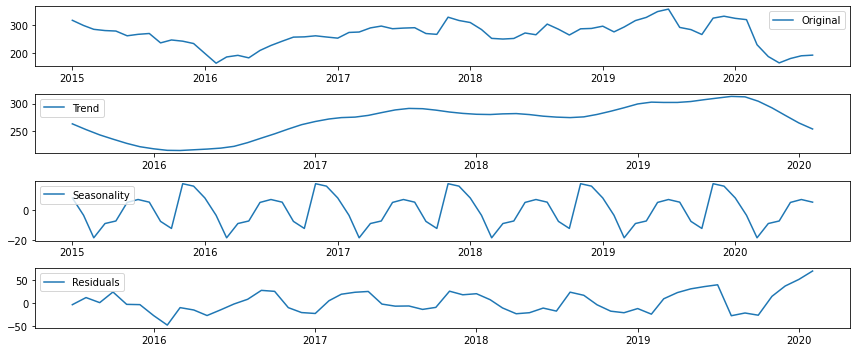

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

trend = decomposition.trend

seasonal = decomposition.seasonal

residual = decomposition.resid
plt.figure(figsize=(12,5))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [17]:
#ADF TEST
from statsmodels.tsa.stattools import adfuller
test1=adfuller(y)

In [18]:
test1

(-2.463793388565246,
 0.1245341051887392,
 1,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 518.9139375748402)

In [19]:
from statsmodels.tsa.stattools import kpss
test2=kpss(y)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [20]:
test2

(0.14067632375824063,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [31]:
import itertools

In [42]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
for i in pdq:
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


In [46]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    try:
        mod = ARIMA(y,order=param)
        result = mod.fit()   
        print('ARIMA{}- AIC:{}'.format(param, result.aic))
    except:
        continue

ARIMA(0, 0, 0)- AIC:713.5430506782665
ARIMA(0, 0, 1)- AIC:659.3972885250155
ARIMA(0, 1, 0)- AIC:615.8710398937232
ARIMA(0, 1, 1)- AIC:616.4041073183398
ARIMA(1, 0, 0)- AIC:626.3233035914786
ARIMA(1, 0, 1)- AIC:625.3338186690563
ARIMA(1, 1, 0)- AIC:616.4024750262053
ARIMA(1, 1, 1)- AIC:618.3843447942128


In [47]:
model=ARIMA(y,order=(1,1,1))

In [48]:
model=model.fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -306.192
Date:                Mon, 08 Mar 2021   AIC                            618.384
Time:                        01:02:03   BIC                            624.998
Sample:                    01-01-2015   HQIC                           621.002
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0809      1.086      0.075      0.941      -2.048       2.210
ma.L1          0.0679      1.111      0.061      0.951      -2.110       2.246
sigma2       545.5407     59.477      9.172      0.000     428.969     662.113
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.16   Skew:                            -0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

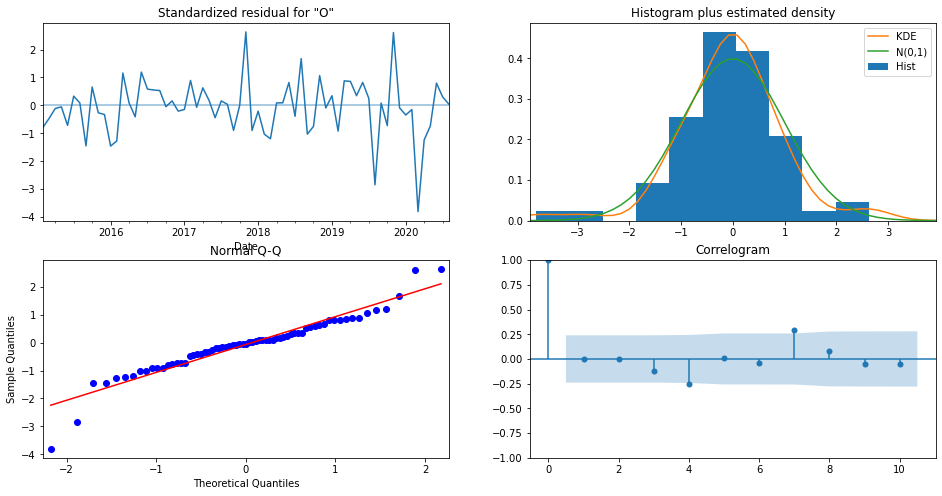

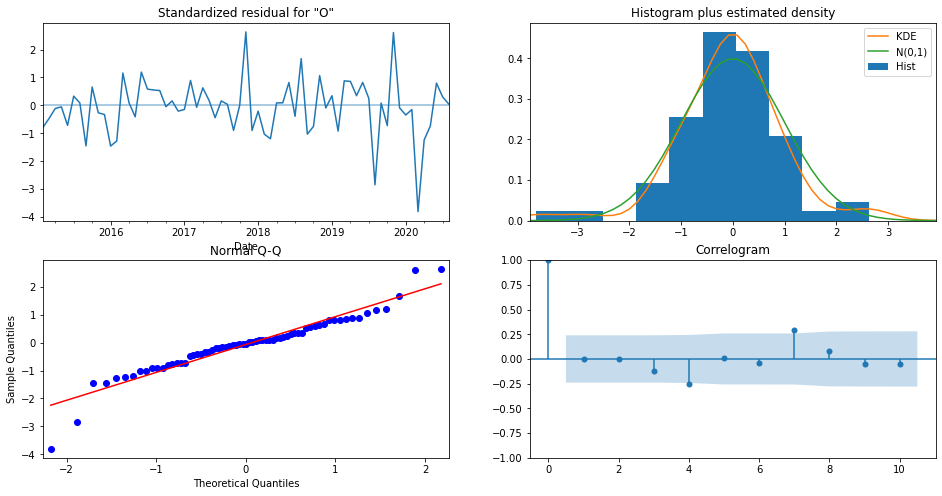

In [51]:
model.plot_diagnostics(figsize = (16, 8))

In [56]:
y.tail()

Date
2020-04-01    187.327778
2020-05-01    164.734211
2020-06-01    180.379545
2020-07-01    190.054348
2020-08-01    192.370000
Freq: MS, Name: Open, dtype: float64

In [62]:
prediction = model.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Open,upper Open
Date,,
2017-01-01,210.582307,302.139333
2017-02-01,206.623176,298.180203
2017-03-01,230.571656,322.128682
2017-04-01,229.017769,320.574795
2017-05-01,245.879329,337.436355
2017-06-01,251.055118,342.612144
2017-07-01,239.302070,330.859097
2017-08-01,243.478458,335.035485
2017-09-01,244.569939,336.126965


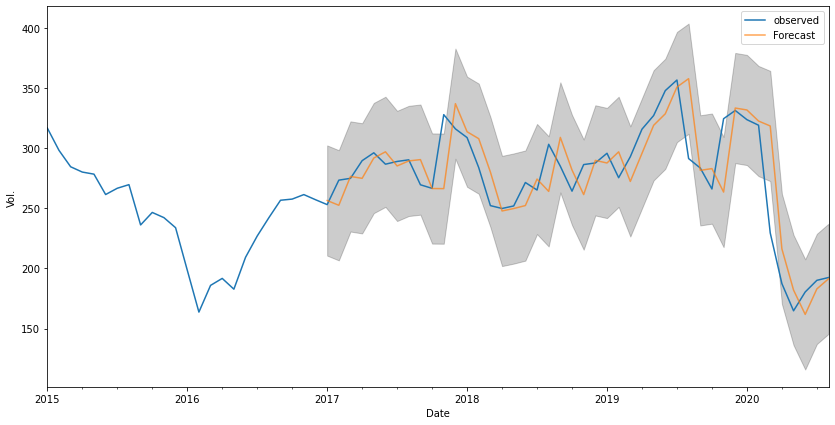

In [63]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Vol.')
plt.legend()
plt.show()